In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# before running this notebook, you need to first extract the metadata from the tokens file
awk 'FS="|" {print $1}' corpus/uniref100_e_tokens_combined_20240910.dat > corpus/uniref100_e_tokens_combined_20240910_metadata.dat

In [16]:
header_columns = ['id', 'len', 'num_tokens', 'num_pfam', 'num_disorder']
tokens_file = "/Users/patrick/dev/ucl/word2vec/comp_0158_msc_project/data/corpus/uniref100_e_tokens_combined_20240910_metadata.dat"

In [17]:
df = pd.read_csv(tokens_file, sep=':', engine='python', names=header_columns)
df.head()

,id,len,num_tokens,num_pfam,num_disorder
0,A0A010PZJ8,493,4,1,3
1,A0A010PZK3,512,5,1,4
2,A0A010PZK7,664,1,1,0
3,A0A010PZK9,372,2,0,2
4,A0A010PZL3,214,1,1,0


In [4]:
# get entries that only have at least one pfam entry
#pfam_df = df[df['num_pfam'] >= 0]

num_tokens


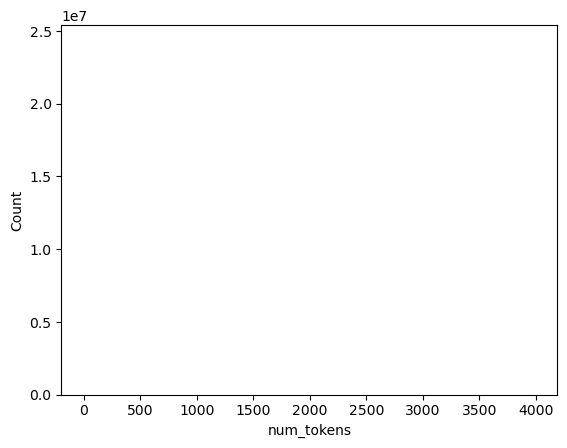

In [18]:
#for col in ['len',  'num_tokens', 'num_pfam', 'num_disorder']:
for col in ['num_tokens']:
  print(col)
  sns.histplot(data=df, x=col)
  plt.show()

In [25]:
#for col in ['len',  'num_tokens', 'num_pfam', 'num_disorder']:
for col in ['num_tokens', 'num_pfam','num_disorder' ]:
    print(col, '\t|', df[col].max(), '|',  df[col].min(), '|', df[col].mean(), '|',  df[col].std(), '\t>', df[col].quantile(0.9), '|', df[col].quantile(0.95), '|', df[col].quantile(0.975), '|', df[col].quantile(0.99))
    
    
    


num_tokens 	| 3991 | 1 | 2.83004378404993 | 3.911199751731963 	> 6.0 | 9.0 | 12.0 | 18.0
num_pfam 	| 3991 | 0 | 1.7852339663564443 | 2.640273806629446 	> 3.0 | 5.0 | 7.0 | 10.0
num_disorder 	| 285 | 0 | 1.044809817693486 | 2.9131764571675505 	> 3.0 | 6.0 | 9.0 | 13.0


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
for col in ['num_tokens', 'num_pfam','num_disorder' ]:
    percentile = df.quantile(0.975)
    
    colq_df = df[col][ df[col] <= percentile]

    print( colq_df.max())

In [ ]:
def num_summary(dataframe, numerical_col, plot= False):
    #quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    quantiles =  [0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

#num_cols = ['len',  'num_tokens', 'num_pfam', 'num_disorder']
num_cols = ['num_pfam']

for col in num_cols:
    num_summary(df, col,plot=True)

#sns.pairplot(df, hue='OUTCOME')